Estimated coefficients:
b_0 = 20879.526469719895          
b_1 = 1757.9542617660204


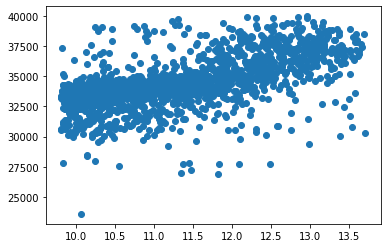

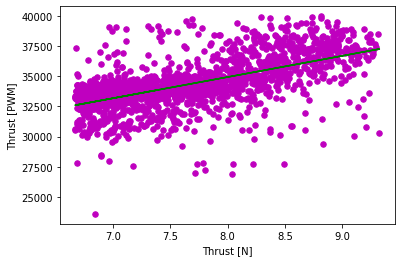

In [11]:
#parse csv file
import csv
import numpy as np
from doreg import *

with open('log_config1-20220613T17-14-21.csv', 'r') as f:
    reader = csv.reader(f)
    data = list(reader)

#remove header
data = data[1:]

#convert to float
for i in range(len(data)):
    for j in range(len(data[i])):
        data[i][j] = float(data[i][j])

g = 9.80665
mass_drone = 0.68

data = np.array(data)
data = data[data[:,1] > 1.0]
data = data[data[:,1] < 1.4]
data[:,1] = (data[:,1] * g)
data = data[data[:,2:].mean(axis=1) > 20000]
data = data[data[:,2:].mean(axis=1) < 40000]    
y = data[:,2:].mean(axis=1) # PWM
X = data[:,1] # (data[:,1] - g) * -1 # Acceleration upwards
plt.figure(2)
plt.scatter(X,y)

# estimating coefficients
X = mass_drone*X
b = linear_regression(X,y)
print("Estimated coefficients:\nb_0 = {}  \
        \nb_1 = {}".format(b[0], b[1]))
# plotting regression line
plt.figure(1)
plot_regression_line(X, y, b)
# y_pred = b[0] + b[1] * x